In [43]:
import numpy as np
import seaborn as sns
from scipy.stats import beta, bernoulli
import matplotlib.pyplot as plt

#### Beta distribution
- scipy.stats.beta(배너를 클릭한 횟수 + 1, 배너를 클릭하지 않은 횟수 +1)

In [61]:
def beta_distribution(tuple_list):
    x = np.linspace(0, 1.0, 100)

    # 베타 분포의 확률밀도함수 계산
    y1 = beta.pdf(x, tuple_list[0][0] + 1, tuple_list[0][1] + 1)
    y2 = beta.pdf(x, tuple_list[1][0] + 1, tuple_list[1][1] + 1)
    y3 = beta.pdf(x, tuple_list[2][0] + 1, tuple_list[2][1] + 1)

    # seaborn을 사용하여 그래프 그리기
    plt.figure(figsize=(10, 6))
    sns.set_style('whitegrid')
    sns.set_style('ticks')
    sns.color_palette("hls", 8)

    # seaborn을 사용한 그래프 그리기
    sns.lineplot(x=x, y=y1, label='banner1', linewidth=3)
    sns.lineplot(x=x, y=y2, label='banner2', linewidth=3)
    sns.lineplot(x=x, y=y3, label='banner3', linewidth=3)

    # 그래프 속성 설정
    plt.title('Beta Distribution')
    plt.xlabel('Click Probability')
    plt.ylabel('Density')
    plt.legend()

    # 그래프 표시
    plt.show()

##### Step1: 아무 데이터가 없는 초기 상태

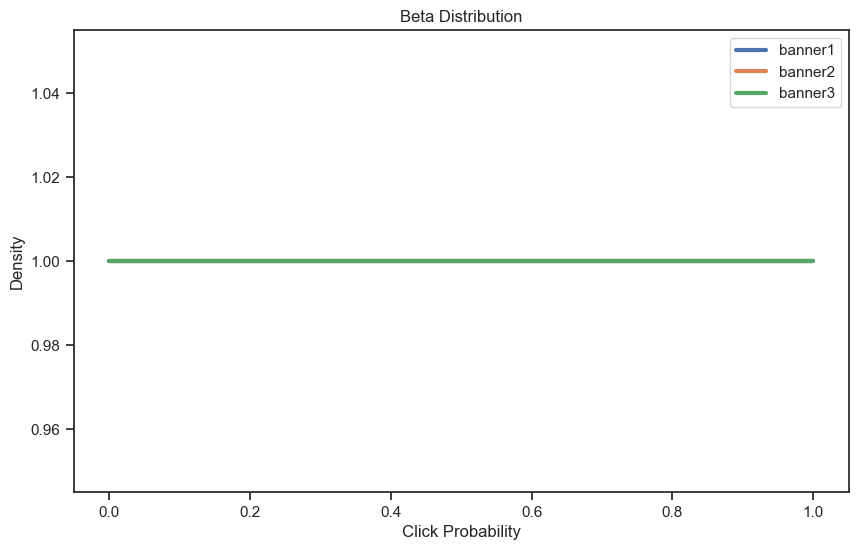

In [26]:
beta_distribution([(0,0),(0,0),(0,0)])

##### Step2:
- 배너1: 노출 후 클릭
- 배너2: 노출 후 클릭 안함
- 배너3: 노출 안함

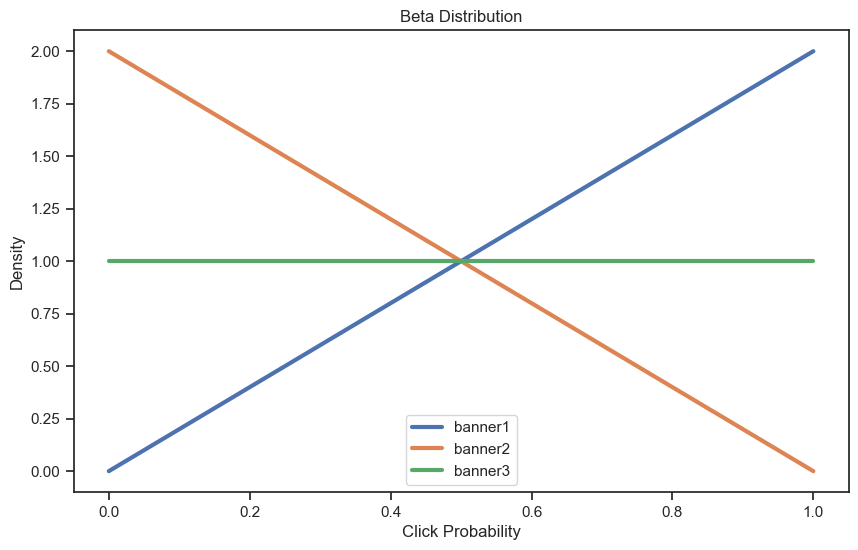

In [27]:
beta_distribution([(1,0),(0,1),(0,0)])

##### Step3:
- 배너1: 노출 후 클릭 안함
- 배너2: 노출 후 클릭 안함
- 배너3: 노출 후 클릭함

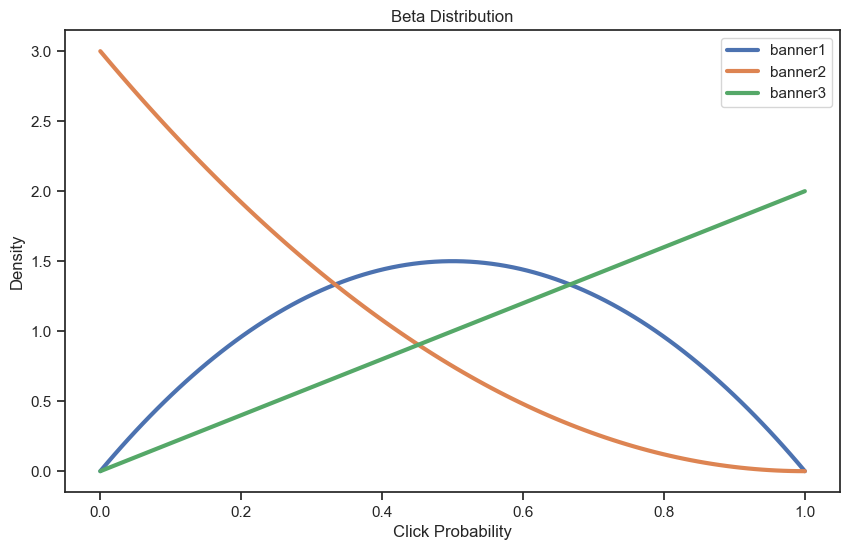

In [28]:
beta_distribution([(1,1),(0,2),(1,0)])

##### Step4:
- 배너1: 노출 후 클릭
- 배너2: 노출 후 클릭
- 배너3: 노출 후 클릭안함

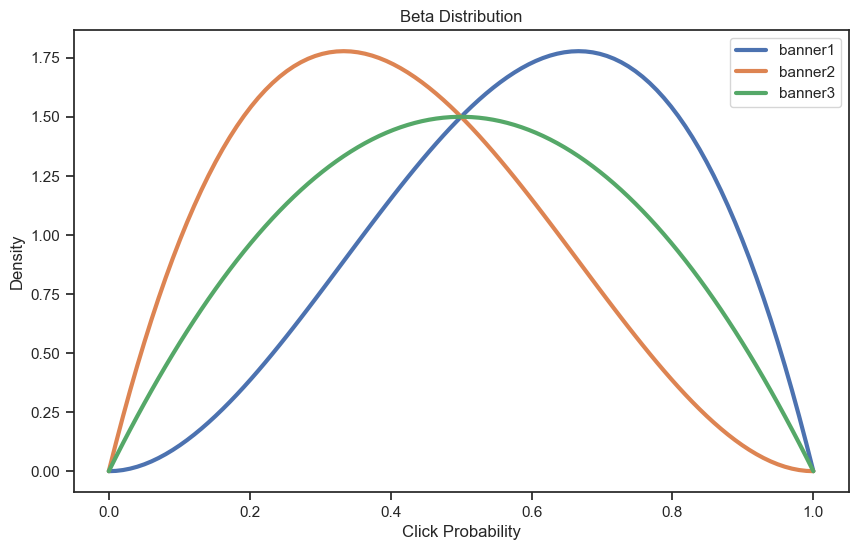

In [29]:
beta_distribution([(2,1),(1,2),(1,1)])

##### 그래서? 뭐쓰는데.
- banner1: 2번 성공 / 3번 시도 = 66%
- banner2: 1번 성공 / 3번 시도 = 33%
- banner3: 1번 성공 / 2번 시도 = 50%

`greedy 알고리즘`: 경험상 가장 성능이 좋았던 선택지만 활용하기 떄문에 banner1 </br>
`e-greedy 알고리즘`: 확률적으로 경험상 가장 성능이 좋았던 선택지만 활용하기 때문에 banner1을 선택하거나 랜덤 선택지를 선택

#### Thompson Sampling
1. 분포 내에서 랜덤 생플링
 - 특정 x 값에 해당하는 분포의 y 값이 클 수록 발생할 확률이 높다. (argmax())
2. 가장 큰 x 값을 낸 분포에 해당하는 배너 노출
3. 노출 후 클릭 여부를 분포에 반영
4. 반복

In [42]:
def beta_distribution_sampling(tuple_list):
    x = np.linspace(0, 1.0, 100)

    # 베타 분포의 확률밀도함수 계산
    y1 = beta.pdf(x, tuple_list[0][0] + 1, tuple_list[0][1] + 1)
    y2 = beta.pdf(x, tuple_list[1][0] + 1, tuple_list[1][1] + 1)
    y3 = beta.pdf(x, tuple_list[2][0] + 1, tuple_list[2][1] + 1)

    # 랜덤으로 값 추출
    random_sample_1 = beta.rvs(tuple_list[0][0] + 1, tuple_list[0][1] + 1, size=1)
    random_sample_2 = beta.rvs(tuple_list[1][0] + 1, tuple_list[1][1] + 1, size=1)
    random_sample_3 = beta.rvs(tuple_list[2][0] + 1, tuple_list[2][1] + 1, size=1)

    # seaborn을 사용하여 그래프 그리기
    plt.figure(figsize=(10, 6))
    sns.set_style('whitegrid')
    sns.set_style('ticks')
    sns.color_palette("hls", 8)

    # seaborn을 사용한 그래프 그리기
    sns.lineplot(x=x, y=y1, label='banner1', linewidth=3)
    sns.lineplot(x=x, y=y2, label='banner2', linewidth=3)
    sns.lineplot(x=x, y=y3, label='banner3', linewidth=3)

    # 랜덤 값 'x'로 표시
    plt.scatter(random_sample_1, 0.0, marker='x', s=200, color='blue')
    plt.scatter(random_sample_2, 0.0, marker='x', s=200, color='orange')
    plt.scatter(random_sample_3, 0.0, marker='x', s=200, color='green')

    # 그래프 속성 설정
    plt.title('Beta Distribution with Random Samples')
    plt.xlabel('Click Probability')
    plt.ylabel('Density')
    plt.legend()

    # 그래프 표시
    plt.show()


##### Step 1:
- 랜덤으로 샘플링한 데이터 확인해보기
- 가장 큰 값을 갖는 분포를 선택한다.

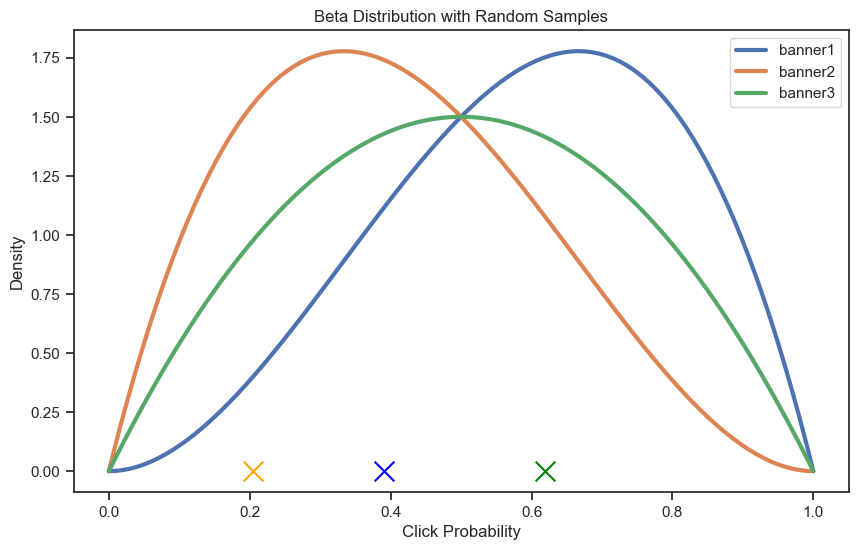

array([0.6193895])

In [41]:
# 예시 데이터
beta_distribution_sampling([(2,1),(1,2),(1,1)])

##### Step2:
- 광고를 클릭할 확률은 `베르누이 분포` 를 따른다.


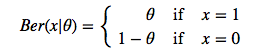

- 실제로는 유저가 선택을 한 것으로 반영될 것이다.


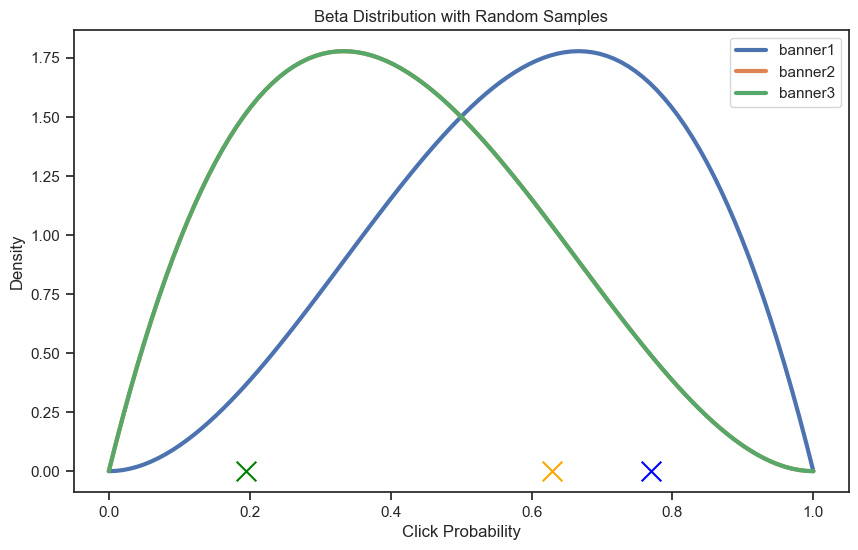

In [50]:
is_select = bernoulli.rvs(0.5, size=1)[0]
if is_select:
    beta_distribution_sampling([(2,1),(1,2),(1+1,1)])
else:
    beta_distribution_sampling([(2,1),(1,2),(1,1+1)])

- 광고가 클릭 되었다면 배너1 와 같은 분포
- 클릭되지 않았다면 배너2 와 같은 분포

-> 현재는 클릭되지 않아 배너 2와 같은 분포를 띈다

`수 많은 실험을 거친 후 결과를 확인한다.`

In [83]:
betas = [[2,1],[1,2],[1,2]]
for _ in range(1000):
    random_sample_1 = beta.rvs(betas[0][0] + 1, betas[0][1] + 1, size=1)[0]
    random_sample_2 = beta.rvs(betas[1][0] + 1, betas[1][1] + 1, size=1)[0]
    random_sample_3 = beta.rvs(betas[2][0] + 1, betas[2][1] + 1, size=1)[0]

    beta_idx = np.array([random_sample_1, random_sample_2, random_sample_3]).argmax()

    is_select = bernoulli.rvs(betas[beta_idx][0]/sum(betas[beta_idx]), size=1)[0]

    if is_select:
        betas[beta_idx][0] += 1
    else:
        betas[beta_idx][1] += 1

    

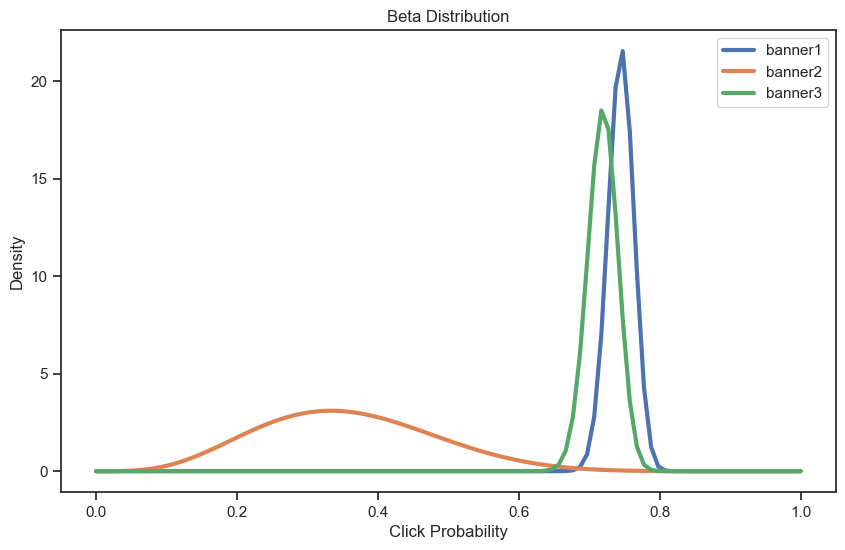

In [84]:
beta_distribution(betas)

In [85]:
betas

[[416, 142], [4, 8], [316, 123]]

- 배너 1이 가장 좋은 것을 분포에서 확인할 수 있었고,
- 다만 배너 3 역시 좋은 배너라고 할 수 있다
- 배너 2 는 노출된 횟수가 적으며, 그때 클릭되지 못하여 빠르게 경쟁에서 밀려났다